# Diffdrive model

this notebook serves as an example on how to use `DiffDriveModel` and odometry as a lightweight simulation.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from roxbot.models.diff_drive import DiffDriveModel

<Axes: title={'center': 'x position'}, xlabel='time'>

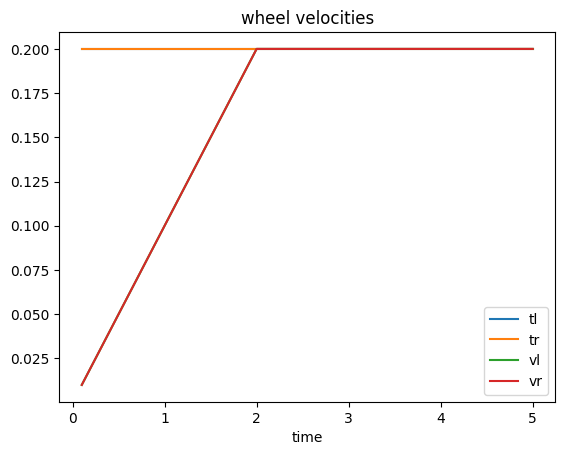

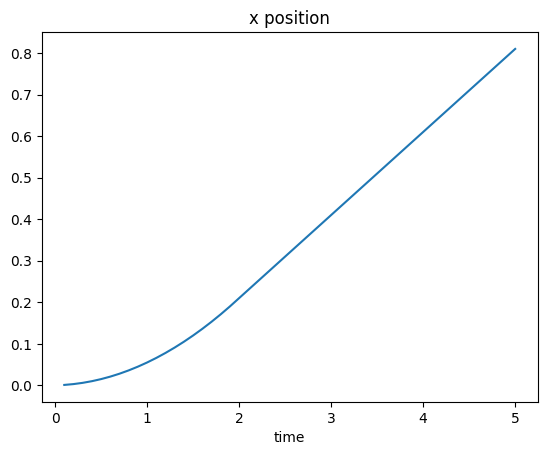

In [17]:

def run_sim(robot: DiffDriveModel, duration: float, dt: float=0.1) -> pd.DataFrame:
    """ run robot simulation for a duration, collect data to a dataframe"""

    t = []
    records = []
    time = 0.0

    for _ in range(int(duration/dt)):
        robot.step(dt)
        time += dt
        tl, tr = robot.setpoints
        pose = robot.pose
        rec = {"x": pose.x, "y": pose.y,
               "theta": pose.theta, "velocity": robot.velocity,
                 "vl": robot.vl,
                 "vr": robot.vr,
                 "tl": tl, "tr": tr}
        records.append(rec)
        t.append(time)

    df = pd.DataFrame.from_records(records, index=t)
    df.index.name = "time"

    return df

# driving straight line
robot = DiffDriveModel(wheel_accel=0.1)
robot.cmd_vel(0.2, 0)

df = run_sim(robot, 5)
df[["tl","tr","vl","vr"]].plot(title="wheel velocities")

plt.figure()
df.x.plot(title="x position")